# ECE1232 Grating Project - Mark Jordan

In [1]:
# This code was written by Mark Jordan
# last modified 3/1/2018

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Problem 1

In [122]:
n1 = 1.5
delta_n1 = .1*10**(-4)
delta_n2 = 2*10**(-4)
delta_n3 = 5*10**(-4)
delta_n4 = 10*10**(-4)

In [123]:
def find_n2(n1,delta_n):
    n2 = n1+delta_n
    return n2

In [124]:
n2_1 = find_n2(n1,delta_n1)
n2_2 = find_n2(n1,delta_n2)
n2_3 = find_n2(n1,delta_n3)
n2_4 = find_n2(n1,delta_n4)
theta = 0

In [125]:
def r_TE(n1,n3,thetai, thetat):
    r_te = (n1*np.cos(thetai)-n3*np.cos(thetat))/(n1*np.cos(thetai)+n3*np.cos(thetat))
    return r_te

In [126]:
def t_TE(n1,n3,thetai, thetat):
    t_te = (2*n1*np.cos(thetai))/(n1*np.cos(thetai)+n3*np.cos(thetat))
    return t_te

In [127]:
def finding_R(r):
    R = np.absolute(r)**2
    return R

In [128]:
r_12_1 = r_TE(n1,n2_1,theta,theta)
r_21_1 = r_TE(n2_1,n1,theta,theta)

r_12_2 = r_TE(n1,n2_2,theta,theta)
r_21_2 = r_TE(n2_2,n1,theta,theta)

r_12_3 = r_TE(n1,n2_3,theta,theta)
r_21_3 = r_TE(n2_3,n1,theta,theta)

r_12_4 = r_TE(n1,n2_4,theta,theta)
r_21_4 = r_TE(n2_4,n1,theta,theta)

In [129]:
r_12_array = np.array([[r_12_1],[r_12_2],[r_12_3],[r_12_4]])
print(r_12_array)

[[ -3.33332222e-06]
 [ -6.66622225e-05]
 [ -1.66638894e-04]
 [ -3.33222259e-04]]


In [130]:
r_21_array = np.array([[r_21_1],[r_21_2],[r_21_3],[r_21_4]])
print(r_21_array)

[[  3.33332222e-06]
 [  6.66622225e-05]
 [  1.66638894e-04]
 [  3.33222259e-04]]


In [131]:
t_12_1 = t_TE(n1,n2_1,theta,theta)
t_21_1 = t_TE(n2_1,n1,theta,theta)

t_12_2 = t_TE(n1,n2_2,theta,theta)
t_21_2 = t_TE(n2_2,n1,theta,theta)

t_12_3 = t_TE(n1,n2_3,theta,theta)
t_21_3 = t_TE(n2_3,n1,theta,theta)

t_12_4 = t_TE(n1,n2_4,theta,theta)
t_21_4 = t_TE(n2_4,n1,theta,theta)

In [132]:
t_12_array = np.array([[t_12_1],[t_12_2],[t_12_3],[t_12_4]])
print(t_12_array)

[[ 0.99999667]
 [ 0.99993334]
 [ 0.99983336]
 [ 0.99966678]]


In [133]:
t_21_array = np.array([[t_21_1],[t_21_2],[t_21_3],[t_21_4]])
print(t_21_array)

[[ 1.00000333]
 [ 1.00006666]
 [ 1.00016664]
 [ 1.00033322]]


In [134]:
def Matrix12(r,t):
    M12 = (1/t)*np.array([[1,r],[r,1]])
    return M12
def Matrix2_free(phi_z,size_of_array):
    j = size_of_array
    i = 0
    M2_free = np.zeros(j, dtype=object)
    #print("M2_free",M2_free)
    while i < j:
        M2_free[i] = np.array([[np.exp(phi_z[i]*1j),0],[0,np.exp(phi_z[i]*(-1j))]])
        i+=1
    #M2_free = np.array([[np.exp(phi_z*1j),0],[0,np.exp(phi_z*(-1j))]])
    return M2_free
def phi_z(n,d,theta,lambda_wavelength):
    phi = 2*np.pi*n*d*np.cos(theta)/lambda_wavelength
    return phi

In [135]:
period_length = 1*10**(-6)
d = period_length/2
size_of_array = 1000
wavelength = np.linspace(2990*10**-9,3010*10**-9,size_of_array)

In [136]:
phi_z_1 = phi_z(n1,d,theta,wavelength)
phi_z_2_1 = phi_z(n2_1,d,theta,wavelength)
phi_z_2_2 = phi_z(n2_2,d,theta,wavelength)
phi_z_2_3 = phi_z(n2_3,d,theta,wavelength)
phi_z_2_4 = phi_z(n2_4,d,theta,wavelength)
phi_z_2_array = np.zeros(4, dtype=object)
phi_z_2_array[0] = phi_z_2_1
phi_z_2_array[1] = phi_z_2_2
phi_z_2_array[2] = phi_z_2_3
phi_z_2_array[3] = phi_z_2_4
print(phi_z_2_array[0][0])

1.57606033321


### start repeating below this

In [137]:
M12 = Matrix12(r_12_array[0],t_12_array[0])
M2 = Matrix2_free(phi_z_2_array[0],size_of_array)
M21 = Matrix12(r_21_array[0],t_21_array[0])
M1 = Matrix2_free(phi_z_1,size_of_array)
#print(M12)
#print(M2[0])
A = np.dot(M12,M2[0])
#print(np.dot(M12,M2[0]))
print(A)

[[ -5.26399966e-03 +9.99989478e-01j   1.75466070e-08 +3.33328715e-06j]
 [  1.75466070e-08 -3.33328715e-06j  -5.26399966e-03 -9.99989478e-01j]]


In [138]:
j = size_of_array
i = 0
M122 = np.zeros(j, dtype=object)
while i < j:
    M122[i] = np.dot(M12,M2[i])
    i+=1
#print(M122)
print(M122[0])

[[ -5.26399966e-03 +9.99989478e-01j   1.75466070e-08 +3.33328715e-06j]
 [  1.75466070e-08 -3.33328715e-06j  -5.26399966e-03 -9.99989478e-01j]]


In [139]:
j = size_of_array
i = 0
M12221 = np.zeros(j, dtype=object)
while i < j:
    M12221[i] = np.dot(M122[i],M21)
    i+=1

In [140]:
j = size_of_array
i = 0
M122211 = np.zeros(j, dtype=object)
while i < j:
    M122211[i] = np.dot(M12221[i],M1[i])
    i+=1

In [141]:
M_period = M122211
M_temp = np.copy(M_period)
print(M_period[0])
print(M_temp[0])
number_of_periods = 10000
i = 0
j = number_of_periods-1
while i < j:
    k = 0
    m = size_of_array
    while k < m:
        M_temp[k] = np.dot(M_temp[k],M_period[k])
        k+=1
    i+=1
    #print(i)
print(M_temp[0])
print(M_period[0])

[[ -9.99944692e-01 -1.05173119e-02j   6.66646008e-06 -3.50225664e-08j]
 [  6.66646008e-06 +3.50225664e-08j  -9.99944692e-01 +1.05173119e-02j]]
[[ -9.99944692e-01 -1.05173119e-02j   6.66646008e-06 -3.50225664e-08j]
 [  6.66646008e-06 +3.50225664e-08j  -9.99944692e-01 +1.05173119e-02j]]
[[-0.06826349 -9.97667528e-01j  0.00063238 -3.32222505e-06j]
 [ 0.00063238 +3.32222505e-06j -0.06826349 +9.97667528e-01j]]
[[ -9.99944692e-01 -1.05173119e-02j   6.66646008e-06 -3.50225664e-08j]
 [  6.66646008e-06 +3.50225664e-08j  -9.99944692e-01 +1.05173119e-02j]]


In [142]:
j = size_of_array
i = 0
r_total1 = np.zeros(j, dtype=object)
R_total1 = np.zeros(j, dtype=object)
while i < j:
    r_total1[i] = M_temp[i][1][0]/M_temp[i][0][0]
    R_total1[i] = (np.absolute(r_total1[i]))**2
    i+=1

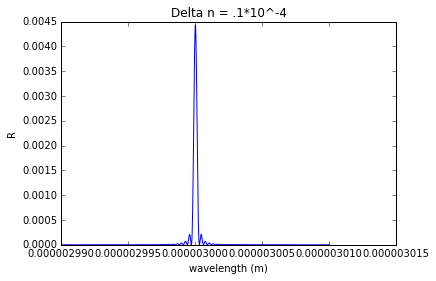

In [143]:
plt.plot(wavelength, R_total1)
plt.xlabel("wavelength (m)")
plt.ylabel("R")
plt.title("Delta n = .1*10^-4")

[2997, 3005, 0, 6]

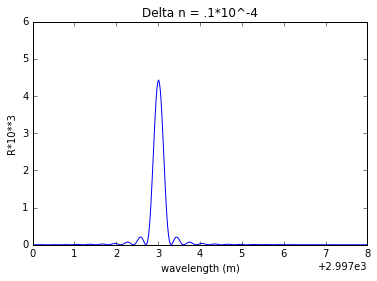

In [147]:
plt.plot(wavelength*10**9, R_total1*10**3)
plt.xlabel("wavelength (m)")
plt.ylabel("R*10**3")
plt.title("Delta n = .1*10^-4")
plt.axis([2997,3005,0,6])

In [148]:
j = size_of_array
i = 0
t_total1 = np.zeros(j, dtype=object)
T_total1 = np.zeros(j, dtype=object)
while i < j:
    t_total1[i] = 1/M_temp[i][0][0]
    T_total1[i] = (np.absolute(t_total1[i]))**2
    i+=1

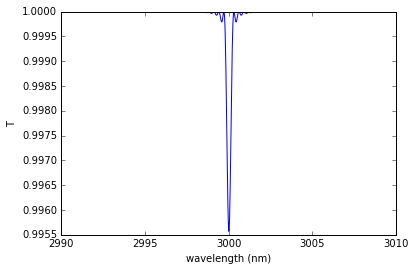

In [149]:
plt.plot(wavelength*10**9, T_total1)
plt.xlabel("wavelength (nm)")
plt.ylabel("T")
#plt.title("Delta n = .1*10^-4")

[2997, 3005, 0.994, 1]

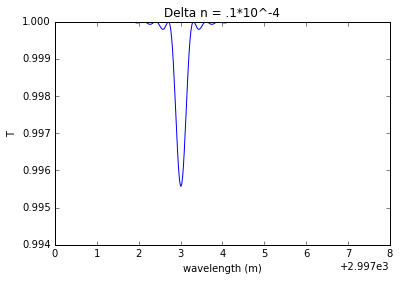

In [150]:
plt.plot(wavelength*10**9, T_total1)
plt.xlabel("wavelength (m)")
plt.ylabel("T")
plt.title("Delta n = .1*10^-4")
plt.axis([2997,3005,0.994,1])

In [151]:
M12 = Matrix12(r_12_array[1],t_12_array[1])
M2 = Matrix2_free(phi_z_2_array[1],size_of_array)
M21 = Matrix12(r_21_array[1],t_21_array[1])
M1 = Matrix2_free(phi_z_1,size_of_array)
#print(M12)
#print(M2[0])
A = np.dot(M12,M2[0])
#print(np.dot(M12,M2[0]))
print(A)

[[ -5.46397646e-03 +1.00005174e+00j   3.64240814e-07 +6.66656716e-05j]
 [  3.64240814e-07 -6.66656716e-05j  -5.46397646e-03 -1.00005174e+00j]]


In [152]:
j = size_of_array
i = 0
M122 = np.zeros(j, dtype=object)
while i < j:
    M122[i] = np.dot(M12,M2[i])
    i+=1
#print(M122)
print(M122[0])

[[ -5.46397646e-03 +1.00005174e+00j   3.64240814e-07 +6.66656716e-05j]
 [  3.64240814e-07 -6.66656716e-05j  -5.46397646e-03 -1.00005174e+00j]]


In [153]:
j = size_of_array
i = 0
M12221 = np.zeros(j, dtype=object)
while i < j:
    M12221[i] = np.dot(M122[i],M21)
    i+=1

In [154]:
j = size_of_array
i = 0
M122211 = np.zeros(j, dtype=object)
while i < j:
    M122211[i] = np.dot(M12221[i],M1[i])
    i+=1

In [155]:
M_period = M122211
M_temp = np.copy(M_period)
i = 0
j = number_of_periods-1
while i < j:
    k = 0
    m = size_of_array
    while k < m:
        M_temp[k] = np.dot(M_temp[k],M_period[k])
        k+=1
    i+=1
print(M_temp[0])

[[ 0.93973404 +3.41932792e-01j -0.00425371 +2.23470501e-05j]
 [-0.00425371 -2.23470501e-05j  0.93973404 -3.41932792e-01j]]


In [156]:
j = size_of_array
i = 0
r_total2 = np.zeros(j, dtype=object)
R_total2 = np.zeros(j, dtype=object)
while i < j:
    r_total2[i] = M_temp[i][1][0]/M_temp[i][0][0]
    R_total2[i] = (np.absolute(r_total2[i]))**2
    i+=1

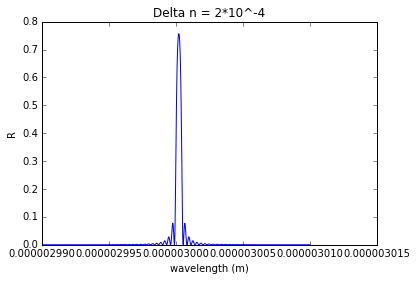

In [157]:
plt.plot(wavelength, R_total2)
plt.xlabel("wavelength (m)")
plt.ylabel("R")
plt.title("Delta n = 2*10^-4")

[2997, 3005, 0, 1]

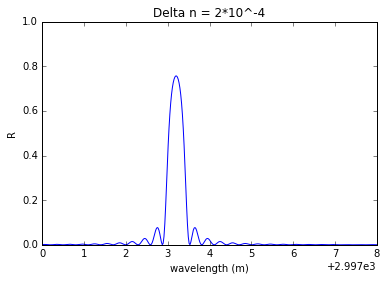

In [158]:
plt.plot(wavelength*10**9, R_total2)
plt.xlabel("wavelength (m)")
plt.ylabel("R")
plt.title("Delta n = 2*10^-4")
plt.axis([2997,3005,0,1])

In [159]:
j = size_of_array
i = 0
t_total2 = np.zeros(j, dtype=object)
T_total2 = np.zeros(j, dtype=object)
while i < j:
    t_total2[i] = 1/M_temp[i][0][0]
    T_total2[i] = (np.absolute(t_total2[i]))**2
    i+=1

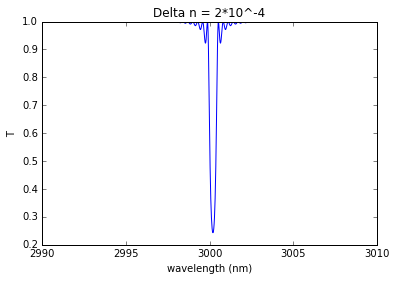

In [160]:
plt.plot(wavelength*10**9, T_total2)
plt.xlabel("wavelength (nm)")
plt.ylabel("T")
plt.title("Delta n = 2*10^-4")

[2997, 3005, 0, 1]

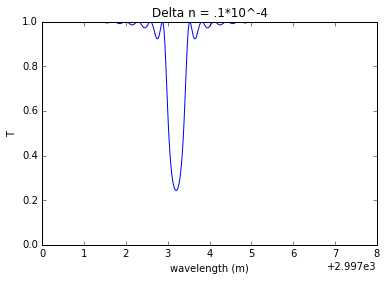

In [161]:
plt.plot(wavelength*10**9, T_total2)
plt.xlabel("wavelength (m)")
plt.ylabel("T")
plt.title("Delta n = .1*10^-4")
plt.axis([2997,3005,0,1])

[[ -5.77978033e-03 +1.00014997e+00j   9.63136200e-07 +1.66663884e-04j]
 [  9.63136200e-07 -1.66663884e-04j  -5.77978033e-03 -1.00014997e+00j]]
[[ -5.77978033e-03 +1.00014997e+00j   9.63136200e-07 +1.66663884e-04j]
 [  9.63136200e-07 -1.66663884e-04j  -5.77978033e-03 -1.00014997e+00j]]
[[-0.95005202 -3.12234106e-01j  0.00943223 -4.95526603e-05j]
 [ 0.00943223 +4.95526603e-05j -0.95005202 +3.12234106e-01j]]


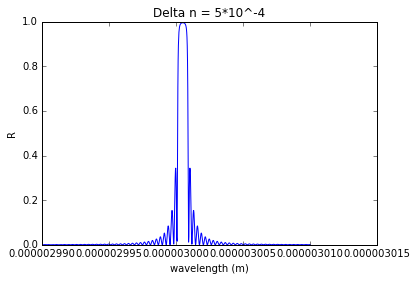

In [162]:
M12 = Matrix12(r_12_array[2],t_12_array[2])
M2 = Matrix2_free(phi_z_2_array[2],size_of_array)
M21 = Matrix12(r_21_array[2],t_21_array[2])
M1 = Matrix2_free(phi_z_1,size_of_array)
#print(M12)
#print(M2[0])
A = np.dot(M12,M2[0])
#print(np.dot(M12,M2[0]))
print(A)

j = size_of_array
i = 0
M122 = np.zeros(j, dtype=object)
while i < j:
    M122[i] = np.dot(M12,M2[i])
    i+=1
#print(M122)
print(M122[0])

j = size_of_array
i = 0
M12221 = np.zeros(j, dtype=object)
while i < j:
    M12221[i] = np.dot(M122[i],M21)
    i+=1
    
j = size_of_array
i = 0
M122211 = np.zeros(j, dtype=object)
while i < j:
    M122211[i] = np.dot(M12221[i],M1[i])
    i+=1
    
M_period = M122211
M_temp = np.copy(M_period)
i = 0
j = number_of_periods-1
while i < j:
    k = 0
    m = size_of_array
    while k < m:
        M_temp[k] = np.dot(M_temp[k],M_period[k])
        k+=1
    i+=1
print(M_temp[0])

j = size_of_array
i = 0
r_total3 = np.zeros(j, dtype=object)
R_total3 = np.zeros(j, dtype=object)
while i < j:
    r_total3[i] = M_temp[i][1][0]/M_temp[i][0][0]
    R_total3[i] = (np.absolute(r_total3[i]))**2
    i+=1
    
plt.plot(wavelength, R_total3)
plt.xlabel("wavelength (m)")
plt.ylabel("R")
plt.title("Delta n = 5*10^-4")

[2997, 3005, 0, 1]

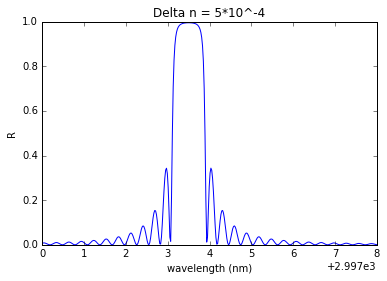

In [163]:
plt.plot(wavelength*10**9, R_total3)
plt.xlabel("wavelength (nm)")
plt.ylabel("R")
plt.title("Delta n = 5*10^-4")
plt.axis([2997,3005,0,1])

In [164]:
j = size_of_array
i = 0
t_total3 = np.zeros(j, dtype=object)
T_total3 = np.zeros(j, dtype=object)
while i < j:
    t_total3[i] = 1/M_temp[i][0][0]
    T_total3[i] = (np.absolute(t_total3[i]))**2
    i+=1

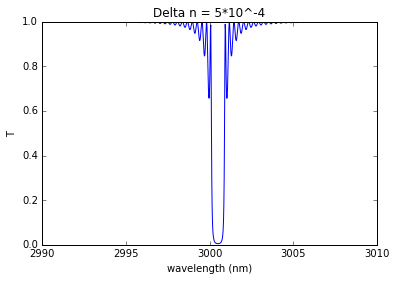

In [165]:
plt.plot(wavelength*10**9, T_total3)
plt.xlabel("wavelength (nm)")
plt.ylabel("T")
plt.title("Delta n = 5*10^-4")

[2997, 3005, 0, 1]

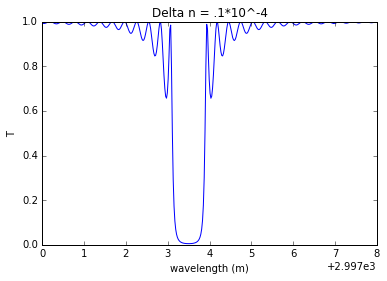

In [166]:
plt.plot(wavelength*10**9, T_total3)
plt.xlabel("wavelength (m)")
plt.ylabel("T")
plt.title("Delta n = .1*10^-4")
plt.axis([2997,3005,0,1])

[[ -6.30625893e-03 +1.00031346e+00j   2.10138585e-06 +3.33326710e-04j]
 [  2.10138585e-06 -3.33326710e-04j  -6.30625893e-03 -1.00031346e+00j]]
[[ -6.30625893e-03 +1.00031346e+00j   2.10138585e-06 +3.33326710e-04j]
 [  2.10138585e-06 -3.33326710e-04j  -6.30625893e-03 -1.00031346e+00j]]
[[-0.65678980 +7.55330479e-01j -0.04355366 +2.28811250e-04j]
 [-0.04355366 -2.28811250e-04j -0.65678980 -7.55330479e-01j]]


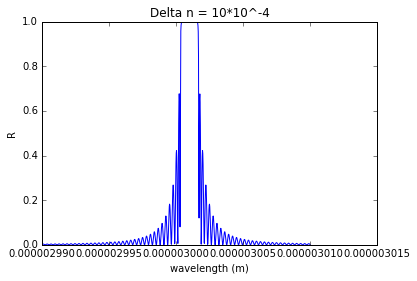

In [167]:
M12 = Matrix12(r_12_array[3],t_12_array[3])
M2 = Matrix2_free(phi_z_2_array[3],size_of_array)
M21 = Matrix12(r_21_array[3],t_21_array[3])
M1 = Matrix2_free(phi_z_1,size_of_array)
#print(M12)
#print(M2[0])
A = np.dot(M12,M2[0])
#print(np.dot(M12,M2[0]))
print(A)

j = size_of_array
i = 0
M122 = np.zeros(j, dtype=object)
while i < j:
    M122[i] = np.dot(M12,M2[i])
    i+=1
#print(M122)
print(M122[0])

j = size_of_array
i = 0
M12221 = np.zeros(j, dtype=object)
while i < j:
    M12221[i] = np.dot(M122[i],M21)
    i+=1
    
j = size_of_array
i = 0
M122211 = np.zeros(j, dtype=object)
while i < j:
    M122211[i] = np.dot(M12221[i],M1[i])
    i+=1
    
M_period = M122211
M_temp = np.copy(M_period)
i = 0
j = number_of_periods-1
while i < j:
    k = 0
    m = size_of_array
    while k < m:
        M_temp[k] = np.dot(M_temp[k],M_period[k])
        k+=1
    i+=1
print(M_temp[0])

j = size_of_array
i = 0
r_total4 = np.zeros(j, dtype=object)
R_total4 = np.zeros(j, dtype=object)
while i < j:
    r_total4[i] = M_temp[i][1][0]/M_temp[i][0][0]
    R_total4[i] = (np.absolute(r_total4[i]))**2
    i+=1
    
plt.plot(wavelength, R_total4)
plt.xlabel("wavelength (m)")
plt.ylabel("R")
plt.title("Delta n = 10*10^-4")

[2997, 3005, 0, 1]

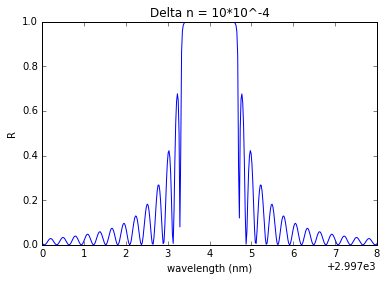

In [168]:
plt.plot(wavelength*10**9, R_total4)
plt.xlabel("wavelength (nm)")
plt.ylabel("R")
plt.title("Delta n = 10*10^-4")
plt.axis([2997,3005,0,1])

In [169]:
j = size_of_array
i = 0
t_total4 = np.zeros(j, dtype=object)
T_total4 = np.zeros(j, dtype=object)
while i < j:
    t_total4[i] = 1/M_temp[i][0][0]
    T_total4[i] = (np.absolute(t_total4[i]))**2
    i+=1

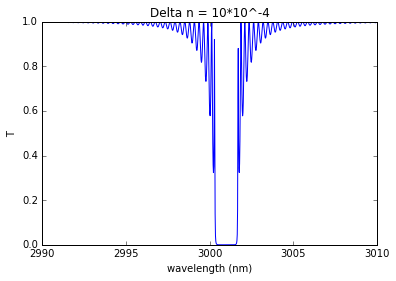

In [170]:
plt.plot(wavelength*10**9, T_total4)
plt.xlabel("wavelength (nm)")
plt.ylabel("T")
plt.title("Delta n = 10*10^-4")

[2997, 3005, 0, 1]

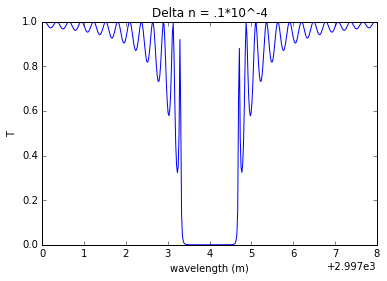

In [171]:
plt.plot(wavelength*10**9, T_total4)
plt.xlabel("wavelength (m)")
plt.ylabel("T")
plt.title("Delta n = .1*10^-4")
plt.axis([2997,3005,0,1])

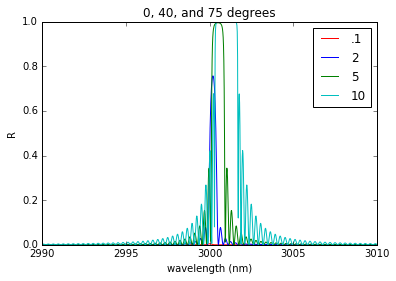

In [172]:
plt.plot(wavelength*10**9, R_total1, color='r', label=".1")
plt.plot(wavelength*10**9, R_total2, color='b', label="2")
plt.plot(wavelength*10**9, R_total3, color='g', label="5")
plt.plot(wavelength*10**9, R_total4, color='c', label="10")
plt.xlabel("wavelength (nm)")
plt.ylabel("R")
plt.title("All delta n")
plt.legend(loc=1)
plt.title("0, 40, and 75 degrees")

[2997, 3005, 0, 1]

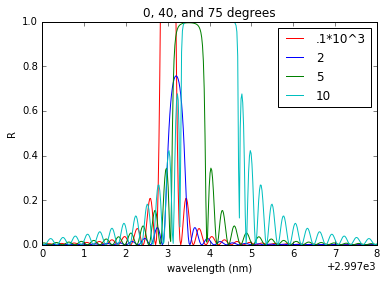

In [173]:
plt.plot(wavelength*10**9, R_total1*10**3, color='r', label=".1*10^3")
plt.plot(wavelength*10**9, R_total2, color='b', label="2")
plt.plot(wavelength*10**9, R_total3, color='g', label="5")
plt.plot(wavelength*10**9, R_total4, color='c', label="10")
plt.xlabel("wavelength (nm)")
plt.ylabel("R")
plt.title("All delta n")
plt.legend(loc=1)
plt.title("0, 40, and 75 degrees")
plt.axis([2997,3005,0,1])

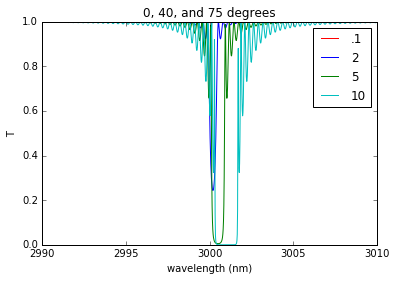

In [174]:
plt.plot(wavelength*10**9, T_total1, color='r', label=".1")
plt.plot(wavelength*10**9, T_total2, color='b', label="2")
plt.plot(wavelength*10**9, T_total3, color='g', label="5")
plt.plot(wavelength*10**9, T_total4, color='c', label="10")
plt.xlabel("wavelength (nm)")
plt.ylabel("T")
plt.title("All delta n")
plt.legend(loc=1)
plt.title("0, 40, and 75 degrees")

# Problem 2

In [175]:
n1 = 1.5
delta_n1 = .1*10**(-4)
delta_n2 = 2*10**(-4)
delta_n3 = 5*10**(-4)
delta_n4 = 10*10**(-4)

In [176]:
def find_n2(n1,delta_n):
    n2 = n1+delta_n
    return n2

In [177]:
n2_1 = find_n2(n1,delta_n1)
n2_2 = find_n2(n1,delta_n2)
n2_3 = find_n2(n1,delta_n3)
n2_4 = find_n2(n1,delta_n4)
theta = 0

In [178]:
def r_Normal_2(n1,n2,delta_n0):
    r_normal = (n1-n2)/(n1+n2)
    return r_normal

In [179]:
r_12_1 = r_TE(n1,n2_1,theta,theta)
r_21_1 = r_TE(n2_1,n1,theta,theta)

r_12_2 = r_TE(n1,n2_2,theta,theta)
r_21_2 = r_TE(n2_2,n1,theta,theta)

r_12_3 = r_TE(n1,n2_3,theta,theta)
r_21_3 = r_TE(n2_3,n1,theta,theta)

r_12_4 = r_TE(n1,n2_4,theta,theta)
r_21_4 = r_TE(n2_4,n1,theta,theta)

## New stuff for problem 2 below

In [180]:
def delta_n(delta_n0,z,L,sigma_L):
    Delta_n = delta_n0*np.exp(-((z-(L/2))**2)/(sigma_L**2))
    return Delta_n

In [189]:
period_length = 1*10**(-6)
d = period_length/2
size_of_array = 200
wavelength = np.linspace(2990*10**-9,3030*10**-9,size_of_array)

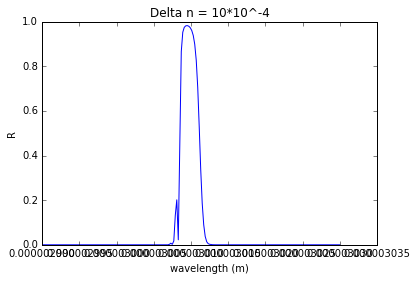

In [190]:
n1 = 1.5
L = 0.01
sigma_L = 0.0025
delta_n0 = 10*10**(-4)
z = 0
Delta_n = delta_n(delta_n0,z,L,sigma_L)
n2 = n1 + Delta_n
delta_z = 1*10**(-6)

p = 0
while z < L:
    #Create arrays
    r_12_4 = r_TE(n1,n2,theta,theta)
    r_21_4 = r_TE(n2,n1,theta,theta)
    r_12_array = np.array([[r_12_1],[r_12_2],[r_12_3],[r_12_4]])
    r_21_array = np.array([[r_21_1],[r_21_2],[r_21_3],[r_21_4]])
    
    t_12_4 = t_TE(n1,n2,theta,theta)
    t_21_4 = t_TE(n2,n1,theta,theta)
    t_12_array = np.array([[t_12_1],[t_12_2],[t_12_3],[t_12_4]])
    t_21_array = np.array([[t_21_1],[t_21_2],[t_21_3],[t_21_4]])
    
    phi_z_2_4 = phi_z(n2,d,theta,wavelength)
    phi_z_2_array[3] = phi_z_2_4
    
    #Create matrices
    M12 = Matrix12(r_12_array[3],t_12_array[3])
    M2 = Matrix2_free(phi_z_2_array[3],size_of_array)
    M21 = Matrix12(r_21_array[3],t_21_array[3])
    M1 = Matrix2_free(phi_z_1,size_of_array)
    
    #Multiply Matrices
    j = size_of_array
    i = 0
    M122 = np.zeros(j, dtype=object)
    while i < j:
        M122[i] = np.dot(M12,M2[i])
        i+=1

    j = size_of_array
    i = 0
    M12221 = np.zeros(j, dtype=object)
    while i < j:
        M12221[i] = np.dot(M122[i],M21)
        i+=1

    j = size_of_array
    i = 0
    M122211 = np.zeros(j, dtype=object)
    while i < j:
        M122211[i] = np.dot(M12221[i],M1[i])
        i+=1
    #Add to z and change n and increment p
    z += delta_z
    Delta_n = delta_n(delta_n0,z,L,sigma_L)
    n2 = n1 + Delta_n
    M_temp = np.copy(M122211)
    if p == 0:
        M_total = np.copy(M_temp)
    else:
        k = 0
        m = size_of_array
        while k < m:
            M_total[k] = np.dot(M_total[k], M_temp[k])
            k+=1
    p += 1
    #repeat

j = size_of_array
i = 0
r_total4 = np.zeros(j, dtype=object)
R_total4 = np.zeros(j, dtype=object)
while i < j:
    r_total4[i] = M_total[i][1][0]/M_total[i][0][0]
    R_total4[i] = (np.absolute(r_total4[i]))**2
    i+=1
plt.plot(wavelength, R_total4)
plt.xlabel("wavelength (m)")
plt.ylabel("R")
plt.title("Delta n = 10*10^-4")

[2990, 3010, 0, 1]

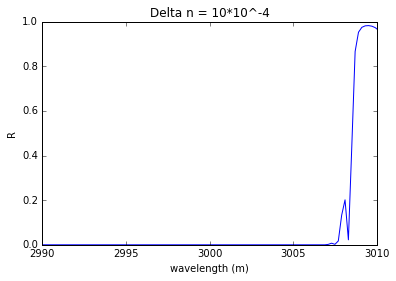

In [191]:
plt.plot(wavelength*10**9, R_total4)
plt.xlabel("wavelength (m)")
plt.ylabel("R")
plt.title("Delta n = 10*10^-4")
plt.axis([2990,3010,0,1])

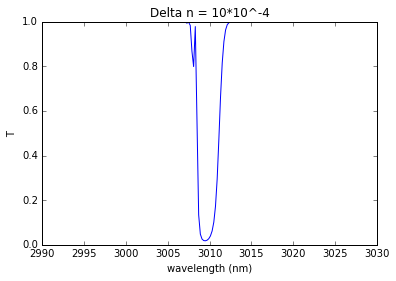

In [192]:
j = size_of_array
i = 0
t_total4 = np.zeros(j, dtype=object)
T_total4 = np.zeros(j, dtype=object)
while i < j:
    t_total4[i] = 1/M_total[i][0][0]
    T_total4[i] = (np.absolute(t_total4[i]))**2
    i+=1
plt.plot(wavelength*10**9, T_total4)
plt.xlabel("wavelength (nm)")
plt.ylabel("T")
plt.title("Delta n = 10*10^-4")

[2997, 3015, 0, 1]

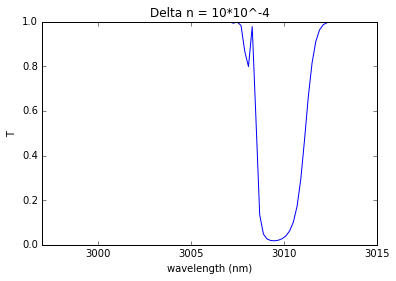

In [194]:
plt.plot(wavelength*10**9, T_total4)
plt.xlabel("wavelength (nm)")
plt.ylabel("T")
plt.title("Delta n = 10*10^-4")
plt.axis([2997,3015,0,1])

# Problem 3

In [195]:
period_length = 1*10**(-6)
period_length1 = 1*10**(-6)
i = 0
total_length = 0
size_of_i_array = 9756
delta_lambda = np.linspace(0,0.05*10**(-6),size_of_i_array)
#while total_length < .01:
while i < size_of_i_array:
        #print("delta_lambda[i]",delta_lambda[i])
        period_length = period_length1 + delta_lambda[i]
        i +=1 
        total_length += period_length
print(period_length)
print(total_length)

1.05e-06
0.0099999


## Therefore need 9756 periods to get 1 cm

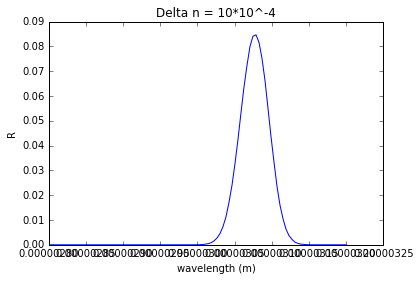

In [196]:
period_length = 1*10**(-6)
period_length1 = 1*10**(-6)
d = period_length/2
size_of_array = 100
wavelength = np.linspace(2800*10**-9,3200*10**-9,size_of_array)

n1 = 1.5
L = 0.01
sigma_L = 0.0025
delta_n0 = 10*10**(-4)
n2 = n1+delta_n0
z = 0
delta_z = 1*10**(-6)

r_12_4 = r_TE(n1,n2,theta,theta)
r_21_4 = r_TE(n2,n1,theta,theta)

r_12_array = np.array([[r_12_1],[r_12_2],[r_12_3],[r_12_4]])
r_21_array = np.array([[r_21_1],[r_21_2],[r_21_3],[r_21_4]])

t_12_4 = t_TE(n1,n2,theta,theta)
t_21_4 = t_TE(n2,n1,theta,theta)

t_12_array = np.array([[t_12_1],[t_12_2],[t_12_3],[t_12_4]])
t_21_array = np.array([[t_21_1],[t_21_2],[t_21_3],[t_21_4]])

p = 0
#while z < L:
n = 0
while n < size_of_i_array:
    #Create arrays
    period_length = period_length1 + delta_lambda[n]
    d = period_length/2
    
    r_12_4 = r_TE(n1,n2,theta,theta)
    r_21_4 = r_TE(n2,n1,theta,theta)
    r_12_array = np.array([[r_12_1],[r_12_2],[r_12_3],[r_12_4]])
    r_21_array = np.array([[r_21_1],[r_21_2],[r_21_3],[r_21_4]])
    
    t_12_4 = t_TE(n1,n2,theta,theta)
    t_21_4 = t_TE(n2,n1,theta,theta)
    t_12_array = np.array([[t_12_1],[t_12_2],[t_12_3],[t_12_4]])
    t_21_array = np.array([[t_21_1],[t_21_2],[t_21_3],[t_21_4]])
    
    phi_z_1 = phi_z(n1,d,theta,wavelength)
    phi_z_2_4 = phi_z(n2,d,theta,wavelength)
    phi_z_2_array[3] = phi_z_2_4
    
    #Create matrices
    M12 = Matrix12(r_12_array[3],t_12_array[3])
    M2 = Matrix2_free(phi_z_2_array[3],size_of_array)
    M21 = Matrix12(r_21_array[3],t_21_array[3])
    M1 = Matrix2_free(phi_z_1,size_of_array)
    
    #Multiply Matrices
    j = size_of_array
    i = 0
    M122 = np.zeros(j, dtype=object)
    while i < j:
        M122[i] = np.dot(M12,M2[i])
        i+=1

    j = size_of_array
    i = 0
    M12221 = np.zeros(j, dtype=object)
    while i < j:
        M12221[i] = np.dot(M122[i],M21)
        i+=1

    j = size_of_array
    i = 0
    M122211 = np.zeros(j, dtype=object)
    while i < j:
        M122211[i] = np.dot(M12221[i],M1[i])
        i+=1
    #Add to z and change n2 and increment p
    z += period_length
    Delta_n = delta_n(delta_n0,z,L,sigma_L)
    n2 = n1 + Delta_n
    M_temp = np.copy(M122211)
    if p == 0:
        M_total = np.copy(M_temp)
    else:
        k = 0
        m = size_of_array
        while k < m:
            M_total[k] = np.dot(M_total[k], M_temp[k])
            k+=1
    p += 1
    n += 1
    #repeat
    
j = size_of_array
i = 0
r_total4 = np.zeros(j, dtype=object)
R_total4 = np.zeros(j, dtype=object)
while i < j:
    r_total4[i] = M_total[i][1][0]/M_total[i][0][0]
    R_total4[i] = (np.absolute(r_total4[i]))**2
    i+=1
plt.plot(wavelength, R_total4)
plt.xlabel("wavelength (m)")
plt.ylabel("R")
plt.title("Delta n = 10*10^-4")

In [197]:
print(period_length)
print(d)

1.05e-06
5.25e-07


[3000, 3200, 0, 0.1]

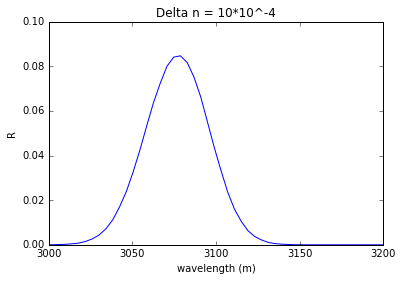

In [198]:
plt.plot(wavelength*10**9, R_total4)
plt.xlabel("wavelength (m)")
plt.ylabel("R")
plt.title("Delta n = 10*10^-4")
plt.axis([3000,3200,0,0.1])

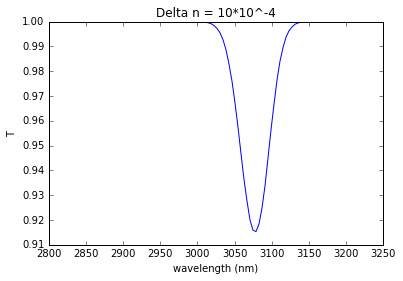

In [199]:
j = size_of_array
i = 0
t_total4 = np.zeros(j, dtype=object)
T_total4 = np.zeros(j, dtype=object)
while i < j:
    t_total4[i] = 1/M_total[i][0][0]
    T_total4[i] = (np.absolute(t_total4[i]))**2
    i+=1
plt.plot(wavelength*10**9, T_total4)
plt.xlabel("wavelength (nm)")
plt.ylabel("T")
plt.title("Delta n = 10*10^-4")

[3000, 3200, 0.9, 1]

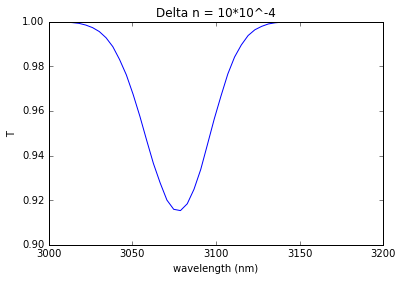

In [200]:
plt.plot(wavelength*10**9, T_total4)
plt.xlabel("wavelength (nm)")
plt.ylabel("T")
plt.title("Delta n = 10*10^-4")
plt.axis([3000,3200,.9,1])

# Problem 4

[[ -6.30625893e-03 +1.00031346e+00j   2.10138585e-06 +3.33326710e-04j]
 [  2.10138585e-06 -3.33326710e-04j  -6.30625893e-03 -1.00031346e+00j]]
[[ -6.30625893e-03 +1.00031346e+00j   2.10138585e-06 +3.33326710e-04j]
 [  2.10138585e-06 -3.33326710e-04j  -6.30625893e-03 -1.00031346e+00j]]


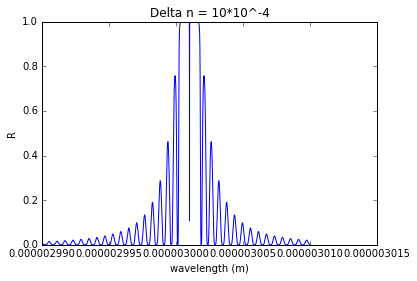

In [227]:
# resetting all variables
n1 = 1.5
delta_n4 = 10*10**(-4)
n2_4 = find_n2(n1,delta_n4)
r_12_4 = r_TE(n1,n2_4,theta,theta)
r_21_4 = r_TE(n2_4,n1,theta,theta)
r_12_array = np.array([[r_12_1],[r_12_2],[r_12_3],[r_12_4]])
r_21_array = np.array([[r_21_1],[r_21_2],[r_21_3],[r_21_4]])
t_12_4 = t_TE(n1,n2_4,theta,theta)
t_21_4 = t_TE(n2_4,n1,theta,theta)
t_12_array = np.array([[t_12_1],[t_12_2],[t_12_3],[t_12_4]])
t_21_array = np.array([[t_21_1],[t_21_2],[t_21_3],[t_21_4]])
period_length = 1*10**(-6)
d = period_length/2
size_of_array = 10000
wavelength = np.linspace(2990*10**-9,3010*10**-9,size_of_array)
phi_z_1 = phi_z(n1,d,theta,wavelength)
phi_z_2_4 = phi_z(n2_4,d,theta,wavelength)
phi_z_2_array[3] = phi_z_2_4

# start of code for new matrix
M12 = Matrix12(r_12_array[3],t_12_array[3])
M2 = Matrix2_free(phi_z_2_array[3],size_of_array)
M21 = Matrix12(r_21_array[3],t_21_array[3])
M1 = Matrix2_free(phi_z_1,size_of_array)
#print(M12)
#print(M2[0])
A = np.dot(M12,M2[0])
#print(np.dot(M12,M2[0]))
print(A)

j = size_of_array
i = 0
M122 = np.zeros(j, dtype=object)
while i < j:
    M122[i] = np.dot(M12,M2[i])
    i+=1
#print(M122)
print(M122[0])

j = size_of_array
i = 0
M12221 = np.zeros(j, dtype=object)
while i < j:
    M12221[i] = np.dot(M122[i],M21)
    i+=1
    
j = size_of_array
i = 0
M122211 = np.zeros(j, dtype=object)
while i < j:
    M122211[i] = np.dot(M12221[i],M1[i])
    i+=1
    
M_period = M122211
M_temp = np.copy(M_period)
i = 0
j = (number_of_periods)/2-1
while i < j:
    k = 0
    m = size_of_array
    while k < m:
        M_temp[k] = np.dot(M_temp[k],M_period[k])
        k+=1
    i+=1


M_temp2 = np.copy(M_temp)
k = 0
m = size_of_array
j = 2
i = 0
#makes the middle M1 three times normal size
while i < j:
    while k < m:
        M_temp2[k] = np.dot(M_temp2[k],M1[k])
        k+=1
    i += 1

k = 0
m = size_of_array
while k < m:
    M_temp2[k] = np.dot(M_temp2[k],M_temp[k])
    k+=1

j = size_of_array
i = 0
r_total4 = np.zeros(j, dtype=object)
R_total4 = np.zeros(j, dtype=object)
while i < j:
    r_total4[i] = M_temp2[i][1][0]/M_temp2[i][0][0]
    R_total4[i] = (np.absolute(r_total4[i]))**2
    i+=1
    
plt.plot(wavelength, R_total4)
plt.xlabel("wavelength (m)")
plt.ylabel("R")
plt.title("Delta n = 10*10^-4")

[2997, 3005, 0, 1]

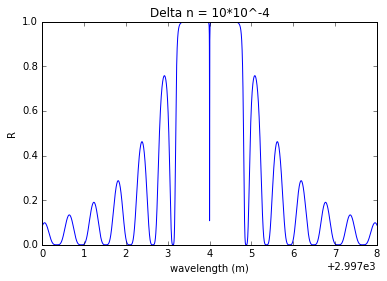

In [228]:
plt.plot(wavelength*10**9, R_total4)
plt.xlabel("wavelength (m)")
plt.ylabel("R")
plt.title("Delta n = 10*10^-4")
plt.axis([2997,3005,0,1])

In [229]:
j = size_of_array
i = 0
t_total4 = np.zeros(j, dtype=object)
T_total4 = np.zeros(j, dtype=object)
while i < j:
    t_total4[i] = 1/M_temp2[i][0][0]
    T_total4[i] = (np.absolute(t_total4[i]))**2
    i+=1

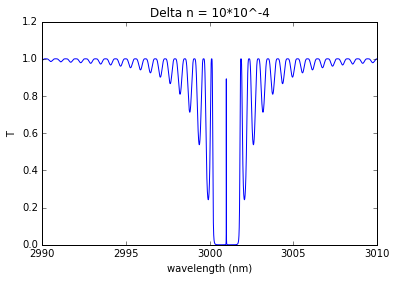

In [230]:
plt.plot(wavelength*10**9, T_total4)
plt.xlabel("wavelength (nm)")
plt.ylabel("T")
plt.title("Delta n = 10*10^-4")

[2997, 3005, 0, 1]

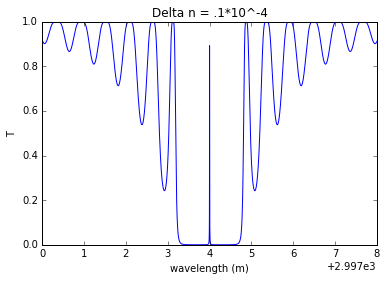

In [231]:
plt.plot(wavelength*10**9, T_total4)
plt.xlabel("wavelength (m)")
plt.ylabel("T")
plt.title("Delta n = .1*10^-4")
plt.axis([2997,3005,0,1])